# Linear Regression 

Linear Regression is a fundamental statistical and machine learning technique used for modeling the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (predictors or features).

The primary goal of linear regression is to find the "best-fit" line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual observed values.

In [2]:
print("This is the program of linear regression")

This is the program of linear regression


## Method 1: By creating our own dataset 

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [27]:
X = np.array([[2, 3], [2, 3], [2, 3], [2, 3], [2, 3]])
Y = np.array([2, 3.5, 4, 5.5, 6])

In [28]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
X_test = np.array([[6, 7], [2, 3]])

In [30]:
predictions = model.predict(X_test)

In [32]:
print("Predictions:", predictions)

Predictions: [4.2 4.2]


## Method 2:  By loading the CSV file

In [33]:
print("By using the data of used cars we will predict the price using linear regression model.")

By using the data of used cars we will predict the price using linear regression model.


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
df = pd.read_csv('car data.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [39]:
df.drop('Car_Name', axis=1, inplace=True) #since it doesn't adds any value in our price prediction model

Remove the Year column and replace Year with Age of the car

In [40]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)

Checking the Null value in our datset

In [46]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

-> No null value present in the dataset

In [48]:
#Analysing the dataset into categorical and numerical datatype
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

We can't use the Categorical fields as they are. They have to be converted to numbers because machines can only understand numbers.

In [55]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


Split the input and output (Selling Price) into separate dataframes

In [61]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

Split original dataset into test and training dataset

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
y_test_actual = y_test

Train the model

In [67]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Find the slope and intercept

In [68]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,4.320423
Fuel_Type_Diesel Coef.,2.669315
Fuel_Type_Petrol Coef.,0.658316
Present_Price Coef.,0.398445
Kms_Driven Coef.,-0.000006
Age Coef.,-0.365880
Owner Coef.,-0.825707
Transmission_Manual Coef.,-1.328705
Seller_Type_Individual Coef.,-1.379434


In [71]:
y_test_pred = linear_reg.predict(X_test)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})
print(df_comp)

     Actual  Predicted
223    8.25   7.580400
150    0.50  -0.362761
226    5.25   4.311910
296    9.50   8.984633
52    18.00  14.046651
261    5.50   4.898039
246    3.75   3.587616
166    0.45   1.386199
221    4.50   5.299918
215    4.50   4.621061
225    2.70   2.422861
133    0.72   1.548530
214    5.25   5.070624
12     7.50   7.387177
15     7.75   8.608671
66    19.75  13.406019
285    7.40   7.178948
89     4.75   4.277895
176    0.35  -0.415244
101    1.70   2.255742
22     4.40   4.947959
205    5.25   3.977194
224    5.11   6.315068
212   11.25   7.837359
190    0.20  -1.809589
129    0.78   1.844006
175    0.38  -0.785790
136    0.65   0.780550
152    0.50   0.027125
55     3.60   6.899154
..      ...        ...
74     4.90   6.899576
239    2.00   2.713966
64    33.00  20.658207
294    3.75   4.335060
286    5.65   5.531391
295    8.55   9.058369
90     3.80   7.040142
173    0.40   3.063075
73     2.65   2.744170
20     2.85   3.978610
46     2.65   3.022045
158    0.48

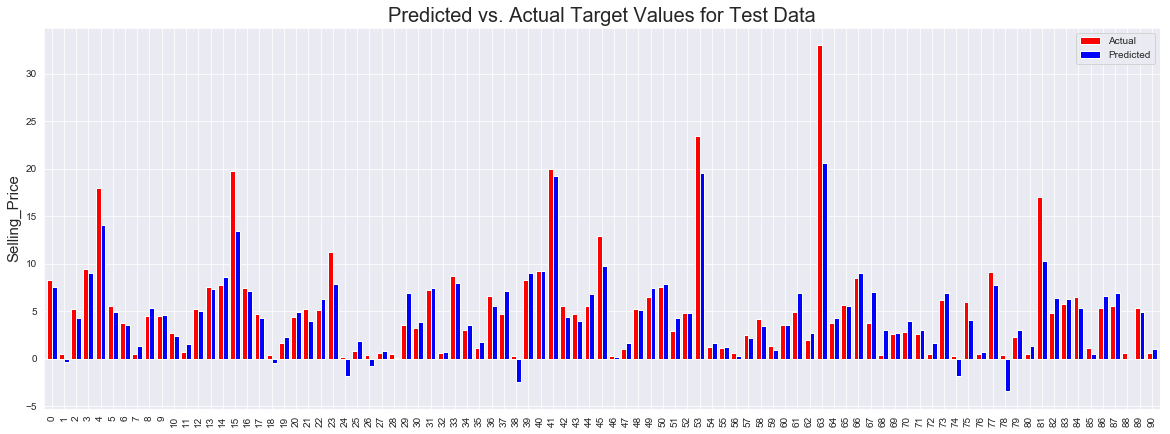

In [72]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

Evaluation of the model: Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R2-Score.

In [74]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.242671
MSE,4.432128
RMSE,2.105262
R2-Score,0.851798
